In [1]:
print("hii")

hii


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# means mein padhunga text  aur text ko seperate kr do ,  
# and header ka name hona chahiye text   emotion 
df = pd.read_csv('train.txt' , sep=';' , header = None, names = ['text', 'emotion'])

In [4]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [6]:
# unique emotions dekho taaki pta kr ske ki predict kya kya krna hai  

df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [7]:
# array bna do 
unique_emotions =  df['emotion'].unique()

emotion_numbers = {}

i = 0 

# dictionary create kr rhe hai 
for emo in unique_emotions:
    emotion_numbers[emo] = i
    i += 1

emotion_numbers

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

above me  dictionary bna diya hai 

ab wo dictionary ko map kr denge 

In [8]:
df['emotion'].head()

0    sadness
1    sadness
2      anger
3       love
4      anger
Name: emotion, dtype: object

jaise dekh skte upper me text aa rha ab usko ek specific me map kr diye hai 
to text ki jagah number ayega 


In [9]:
df['emotion'] = df['emotion'].map(emotion_numbers)

df['emotion'].head()

0    0
1    0
2    1
3    2
4    1
Name: emotion, dtype: int64

In [10]:
df.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


# convert lower case 

In [11]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [12]:
import string 

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [13]:
df['text'] = df['text'].apply(remove_punctuation)

removing number

In [14]:
# number remvoe krne ke liye fun 

def remove_numbers(txt):
  new =""
  for i in txt :
    if i.isdigit() == False:
        new = new + i   
  return new

df['text'] = df['text'].apply(remove_numbers)


# url remove krne ke liye 

- suppose hhtps aagya to skip kr dena 

In [15]:
# remove emojis 

def remove_emojis(txt):
  new = ""
  for i in txt :
    if i.isascii():
      new +=i 
  return new 

df['text'] = df['text'].apply(remove_emojis)

# Stop words removing 

- NLTK library ka use krkre 
- agr ML ka project hai to hta dena chahiye [ deep learning me nhi hatao to chalega qki wo noise handle kr dega ]
- agr text ka meaning janna hai tb rahne dena chahiye 
-

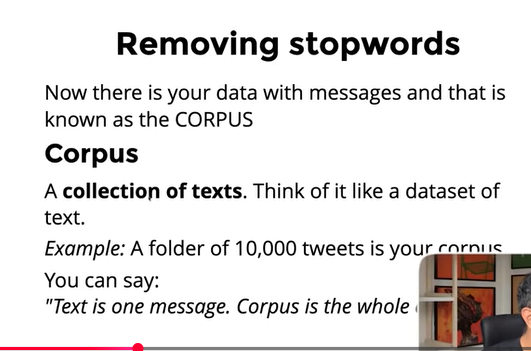

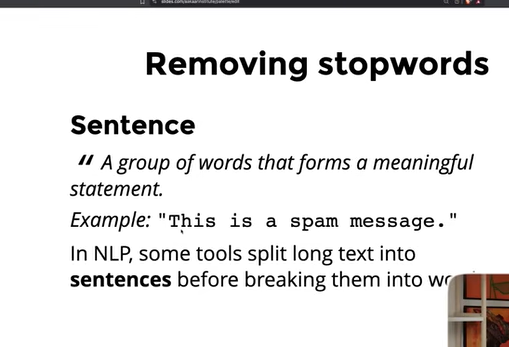

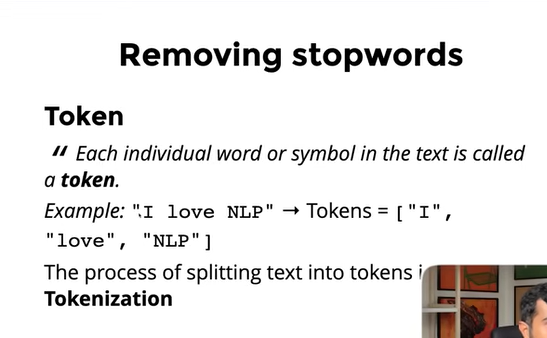

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
# unnecessary  words jo ki meaning nhi dete 
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
len(stop_words)

198

In [21]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

- ab yaha hame stop words remvoe krna hoga 
- usse pehle ye sare words ko array me layenge 
 - ye tokenization hota 
- ['i' 'can' 'go' 'from' 'feeling' 'so' 'hopeless' 'to' 'so' 'damned' ]
- ab above wala type banega array then 
- match hoga ki ye words stop words hai ya nhi 
- jo jo  stop words me ayenge wo remvoe ho jayega 

 

# .. 

- yaha que  ata ki split q nhi kr deta spaces ke according 
- eg  i am happy!! 
 - aise case me split  i am  happy!! krke hoga exclamation mark nhi hatega 
 - lekin tokenizaiton [nklt ] ke karan ab ye !! mark bhi ht jayega 

return " ".join(cleaned) means:

👉 Join all items in the list cleaned into one string, with spaces between them.

" " → this is the separator (a space)

.join(cleaned) → this takes all elements of the list cleaned and joins them into a single string, separated by spaces.

Example
cleaned = ["I", "love", "Python"]
result = " ".join(cleaned)
print(result)


Output:

I love Python


So the line:

return " ".join(cleaned)


means: return the cleaned words as a single string.

In [22]:
def remove1(txt):
  words = txt.split()
  cleaned = []
  for w in words:
    # agr stop word ka part  nhi hai to  cleaned me le lo 
    if not w in stop_words:
      cleaned.append(w)
  return " ".join(cleaned)

In [23]:
 
# Now apply the remove functio
df['text'] = df['text'].apply(remove1)

In [24]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [25]:
df.head()

,text,emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,1


# ab 80 / 20 me split krenge 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=42)

In [27]:
X_train

676      refers course though cant help feeling somehow...
12113                im starting feel im suffering fatigue
7077     feel like probably would liked book little bit...
13005                                  really feel awkward
12123    im feeling little grumpy today lame weather te...
                               ...                        
13418    love leave reader feeling confused slightly de...
5390                                         feel delicate
860                          starting feel little stressed
15795             feel stressed tired worn shape neglected
7270         feel someone rude wrongly done something lose
Name: text, Length: 12800, dtype: object

In [28]:
X_test

8756                             ive made week feel beaten
4660                              feel strategy worthwhile
6095                     feel worthless weak say want find
304                                        feel clever nov
8241                      im moved ive feeling kind gloomy
                               ...                        
15578    feel useful pulpit find ironic often question ...
5746             dried bladders ready day im feeling brave
6395                             feel thrilled matter days
7624     woke morning text mr c declaring walking work ...
15245                                            feel dumb
Name: text, Length: 3200, dtype: object

In [29]:
df.shape

(16000, 2)

In [31]:
y_train.shape

(12800,)

In [32]:
# ab x train , y train ko vector me convert krenge 



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer



In [34]:
bow_vectorizer = CountVectorizer()


pure X train ko change nhi krenge qki wo ti idf ke liye bhi change hoga 

In [38]:

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [ ]:
X_train_bow 

# yaha dekh skte sparsity create hoga  to wo fit hone ke liye comprase ho jayega 

<12800x13361 sparse matrix of type '<class 'numpy.int64'>'
	with 116059 stored elements in Compressed Sparse Row format>

In [41]:
# gausian naive bayes : nurarical ke liye use hota 
# words ka liye multinomial naiive bayes use hota 
from  sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix




In [42]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow , y_train)

MultinomialNB()

In [43]:
pred_db = nb_model.predict(X_test_bow)

In [44]:
pred_db

array([0, 5, 0, ..., 5, 5, 0], dtype=int64)

In [45]:
print(accuracy_score(y_test , pred_db))

0.768125


# TF-IDf 

In [46]:
tfidf_vectorizer = TfidfVectorizer()


In [47]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [48]:
# linear regression ka use krenge 

nb2_model = MultinomialNB()
nb2_model.fit(X_train_tfidf , y_train)


MultinomialNB()

In [51]:
y_pred= nb2_model.predict(X_test_tfidf)

In [52]:
accuracy_score(y_test , y_pred)

0.6609375

In [54]:
# ab logistic regression ka use krke dekhenge  ki accuracy kya aati hai
# qki ye prediciton me acha kaam ata 

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression( max_iter=1000)




In [55]:
logistic_model.fit(X_train_tfidf , y_train)

LogisticRegression(max_iter=1000)

In [57]:
log_pred = logistic_model.predict(X_test_tfidf)

In [58]:
accuracy_score(y_test , log_pred)

0.8628125